
## <center>*Contents:* </center><a class="anchor" id="contents"></a>

## [Introduction](#intro)

## 1. [Data](#import)

#### 1.1. [Library import, references and data loading](#import)
#### 1.2. [Preprocessing](#preprocessing)

## 2. [Fast analysis](#fanalysis)

## 3. [Deep analysis, feature engineering & selection](#da)

## 4. [Prediction preparing](#pred)

## 4.1. [Quality metrics](#quality-metrics)

## 5. [Basic Models](#basic_models)

#### 5.1. [ Logistic regression](#Log)
#### 5.2. [LinearSVC](#LinearSVC)
#### 5.3. [kNN (K-Nearest Neighbors)](#kNN)
#### 5.4. [DicisionTreeClassifier](#dtc)
#### 5.5. [Aggregation metrics](#agg_m)


## 6. [Ensemble and hybrid methods](#ensembles)

#### 6.1. [Bagging ](#bagging)
#### 6.2. [RandomForestClassifier](#rfc)
#### 6.3. [Boosting ](#boosting)


## 7. [Custom ensemble](#ce)
#### 7.1 [Blending idea](#blending)
#### 7.2 [Create custom ensemble](#stack)

# Introduction <a class="anchor" id="intro"></a>

Мы получаем на входе список врачей (`npi` - уникальный ID) со спецификацией по практике в США (обобщенное место работы, количество лет практике, пол) и детализацией выписанных препартов (более 2000 различных наименований).

Задание позволяет выбрать проблематику исследовния, на основе которой провести классификацию объектов датасета (врачей).

Данная тетрадь не предполагает углубленного изучения природы и специфики данных, однако стоит понимать, что это обязательное условие для решения реальной бизнесс или научной задачи. Успех аналитики в наибольшей степени зависит от понимания исхдных данных.

**Изучить специфику и поставить задачу рекомендуется самостоятельно.**


**[источник выгрузки](https://npino.com/):**

**What is a NPI Number? :** The National Provider Identifier (NPI) is a unique identification number for covered health care providers. The NPI is a 10-position, intelligence-free numeric identifier (10-digit number). This means that the numbers do not carry other information about healthcare providers, such as the state in which they live or their medical specialty. The NPI must be used in lieu of legacy provider identifiers in the HIPAA standards transactions. Covered health care providers and all health plans and health care clearinghouses must use the NPIs in the administrative and financial transactions adopted under HIPAA (Health Insurance Portability and Accountability Act).

**Where NPI should be used? :** The NPI must be used in place of legacy provider identifiers, such as a Unique Provider Identification Number (UPIN), Online Survey Certification & Reporting (OSCAR) and National Supplier Clearinghouse (NSC) in HIPAA standard transactions. There are two categories of health care providers for NPI enumeration purposes. Entity Type 1 providers are individual providers who render health care (e.g., physicians, dentists, nurses). Sole proprietors and sole proprietorships are Entity Type 1 (Individual) providers. Organization health care providers (e.g., hospitals, home health agencies, ambulance companies) are considered Entity Type 2 (Organization) providers.

**Who must obtain NPI? :** All health care providers who are HIPAA-covered entities, whether they are individuals (e.g., physicians, nurses, dentists, chiropractors, physical therapists, or pharmacists) or organizations (e.g., hospitals, home health agencies, clinics, nursing homes, residential treatment centers, laboratories, ambulance companies, group practices, Health Maintenance Organizations (HMOs), suppliers of durable medical equipment, pharmacies) must obtain an NPI. The NPI will be used by HIPAA-covered entities (e.g., health plans, health care clearinghouses, and certain health care providers) to identify health care providers in HIPAA standard transactions. A covered health care provider, under HIPAA, is any health care provider who transmits health information in electronic form in connection with a transaction for which the Secretary of Health and Human Services has adopted a standard, even if the health care provider uses a business associate to do so.


In [2]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import statistics
%matplotlib inline

# библиотке для импорта картинок из локальной папки
from IPython.display import Image
# библиотке для импорта картинок из сети
from IPython.display import HTML

о библиотеках подробнее:

### [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)

* [базовые функции pandas](https://smysl.io/blog/pandas/)
* [справочник на русском по pandas](https://riptutorial.com/Download/pandas-ru.pdf)

### [matplotlib](https://matplotlib.org/3.1.1/users/index.html)

* [самоучитель](https://pyprog.pro/mpl/mpl_install.html)
* [отличная статья на английском](https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0)

[Исходный датасет](https://drive.google.com/open?id=1W7AnPqWfHBzybjqIqyVPiwuF-eR85J8O) в формте `json`. О работе с `json` можно подробнне [почитать на русском](https://pyneng.readthedocs.io/ru/latest/book/17_serialization/2_json.html), механика импорта словарей в таблицы `pandas` хорошо описана в этой [статье (на аглийском)](https://mindtrove.info/flatten-nested-json-with-pandas/).

#### Читаем файл построчно, и сохраняем его в список `data`.

In [3]:
data = []
for line in open('roam_prescription_based_prediction.jsonl', 'r'):
    data.append(json.loads(line))     

#### Преобразуем словарь с помощью метода [`json_normalize`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) к сущности `pandas.DataFrame`.

In [4]:
df = pd.io.json.json_normalize(data)

# после преобразования выводим первые 2 строки таблицы
df.head(2)

,cms_prescription_counts.1ST TIER UNIFINE PENTIPS,cms_prescription_counts.ABACAVIR,cms_prescription_counts.ABELCET,cms_prescription_counts.ABILIFY,cms_prescription_counts.ABILIFY DISCMELT,cms_prescription_counts.ABILIFY MAINTENA,cms_prescription_counts.ABRAXANE,cms_prescription_counts.ABSTRAL,cms_prescription_counts.ACAMPROSATE CALCIUM,cms_prescription_counts.ACANYA,...,cms_prescription_counts.ZYTIGA,cms_prescription_counts.ZYVOX,npi,provider_variables.brand_name_rx_count,provider_variables.gender,provider_variables.generic_rx_count,provider_variables.region,provider_variables.settlement_type,provider_variables.specialty,provider_variables.years_practicing
0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1295763035,384,M,2287,South,non-urban,Nephrology,7
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1992715205,0,M,103,South,non-urban,General Practice,7


#### С помощью методов `.info()` и `.describe()` выведем общую информацию о таблиице. Метод `.info()` выводит название всех столбцов, количество заполненных значений, и тип данных для столбца (`int64`, `object`(`str`):

In [5]:
print(df.info())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239930 entries, 0 to 239929
Columns: 2405 entries, cms_prescription_counts.1ST TIER UNIFINE PENTIPS to provider_variables.years_practicing
dtypes: float64(2397), int64(3), object(5)
memory usage: 4.3+ GB


**4.3 Gb** это огромная нагрузка на компьютер, нам нужно сжать таблицу, чтобы мы могли работать дальше, подробнее о методолгии можно прочитать на **Habr:** [pandas для анализа больших наборов данных](https://habr.com/ru/company/ruvds/blog/442516/).

#### Заполняем пустые значения `NaN` нулями

In [7]:
df = df.fillna(0)

#### Устанавливаем индексами строк таблицы `npi` - ID номер врача:

In [8]:
df = df.set_index('npi')
df.head(2)

,cms_prescription_counts.1ST TIER UNIFINE PENTIPS,cms_prescription_counts.ABACAVIR,cms_prescription_counts.ABELCET,cms_prescription_counts.ABILIFY,cms_prescription_counts.ABILIFY DISCMELT,cms_prescription_counts.ABILIFY MAINTENA,cms_prescription_counts.ABRAXANE,cms_prescription_counts.ABSTRAL,cms_prescription_counts.ACAMPROSATE CALCIUM,cms_prescription_counts.ACANYA,...,cms_prescription_counts.ZYPREXA ZYDIS,cms_prescription_counts.ZYTIGA,cms_prescription_counts.ZYVOX,provider_variables.brand_name_rx_count,provider_variables.gender,provider_variables.generic_rx_count,provider_variables.region,provider_variables.settlement_type,provider_variables.specialty,provider_variables.years_practicing
npi,,,,,,,,,,,,,,,,,,,,,
1295763035,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,384,M,2287,South,non-urban,Nephrology,7
1992715205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,M,103,South,non-urban,General Practice,7


#### Преобразуем структуру таблицы, перенесем в начало последние 7 колонок(`cols[:-7]`) и сократим заголовки с помощью переменной `new_cols`.

In [9]:
cols = df.columns.tolist()
cols = cols[-7:] + cols[:-7]
df = df[cols]

#### Присвоим таблице зоголовки `new_cols` который с помощью цикла `for n in cols:`, и регулярного выражения `re.sub(...)` -  сократим заголовки до исходных, убрав префиксы, которые образовались после нормализации. 

In [10]:
new_cols = []
for n in cols:
    if n.count('provider_variables.') == 1:
        n = re.sub('provider_variables.', '', n)
    if n.count('cms_prescription_counts.') == 1:
        n = re.sub('cms_prescription_counts.', '', n)
    new_cols.append(n)

In [11]:
df.columns = new_cols
df.head(2)

,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing,1ST TIER UNIFINE PENTIPS,ABACAVIR,ABELCET,...,ZYFLO,ZYFLO CR,ZYLET,ZYLOPRIM,ZYMAXID,ZYPREXA,ZYPREXA RELPREVV,ZYPREXA ZYDIS,ZYTIGA,ZYVOX
npi,,,,,,,,,,,,,,,,,,,,,
1295763035,384,M,2287,South,non-urban,Nephrology,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992715205,0,M,103,South,non-urban,General Practice,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Оптимизируем данные о выписанных медикаментах, чтобы таблица занимала меньше места.

In [12]:
float_df_1 = df[new_cols[7:1200]]
converted_int_1 = float_df_1.apply(pd.to_numeric,downcast='signed')
del float_df_1

In [13]:
float_df_2 = df[new_cols[1200:]]
converted_int_2 = float_df_2.apply(pd.to_numeric,downcast='signed')
del float_df_2

#### Создадим таблицу `drugs` в которй будет находиться база выписанных рецептов.

In [18]:
drugs = pd.concat([converted_int_1,converted_int_2],axis=1)
drugs.head()

,1ST TIER UNIFINE PENTIPS,ABACAVIR,ABELCET,ABILIFY,ABILIFY DISCMELT,ABILIFY MAINTENA,ABRAXANE,ABSTRAL,ACAMPROSATE CALCIUM,ACANYA,...,ZYFLO,ZYFLO CR,ZYLET,ZYLOPRIM,ZYMAXID,ZYPREXA,ZYPREXA RELPREVV,ZYPREXA ZYDIS,ZYTIGA,ZYVOX
npi,,,,,,,,,,,,,,,,,,,,,
1295763035,0,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1992715205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578587630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1932278405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437366804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239930 entries, 1295763035 to 1144252818
Columns: 2397 entries, 1ST TIER UNIFINE PENTIPS to ZYVOX
dtypes: int16(863), int8(1534)
memory usage: 747.8+ MB


In [16]:
del converted_int_1, converted_int_2

#### Создадим таблицу `main_df` в которй будет находиться первая часть таблицы, без медецинским препаратов.

In [19]:
main_df = df[new_cols[:7]]

In [21]:
print(main_df.info())
main_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 239930 entries, 1295763035 to 1144252818
Data columns (total 7 columns):
brand_name_rx_count    239930 non-null int64
gender                 239930 non-null object
generic_rx_count       239930 non-null int64
region                 239930 non-null object
settlement_type        239930 non-null object
specialty              239930 non-null object
years_practicing       239930 non-null int64
dtypes: int64(3), object(4)
memory usage: 14.6+ MB
None


,brand_name_rx_count,generic_rx_count,years_practicing
count,239930.000000,239930.000000,239930.000000
mean,176.264144,795.547047,6.241875
std,475.159281,1809.618284,1.649269
min,0.000000,0.000000,1.000000
25%,0.000000,36.000000,6.000000
50%,15.000000,145.000000,7.000000
75%,154.000000,750.000000,7.000000
max,30547.000000,101079.000000,8.000000


#### Преобразуем категориальные строковые данные в `main_df` к числовым эквивалентам cпомощью метода `get_dummies`.

#### `gender`, `settlement_type` преобразуем к столбцам `male`, `urban`, где 1 это "да", 0 - "нет".

#### Возможно также  преобразуем `region` к 4-м столбцам согласно количеству уникальных значений в текущем столбце.

In [22]:
male = pd.get_dummies(main_df['gender'])
urban = pd.get_dummies(main_df['settlement_type'])

# пока не уверен, что нужно его преобразовыавать
# region =  pd.get_dummies(main_df['region'])

#### Переименуем столюбец "M" в "male"

In [23]:
male = male.rename(columns={"M": "male"})

#### Объединим 4 таблицы в одну (`pd.concat`) и удалим лишние столбцы(`main_df.drop`).

In [24]:
main_df = pd.concat([main_df, male, urban], axis = 1)

In [25]:
main_df= main_df.drop(['non-urban','F', 'gender','settlement_type'], axis=1)

In [26]:
# .sample(n) - выводит n случайных строк таблицы
main_df.sample(5)

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban
npi,,,,,,,
1932286135,12,106,West,Family,7,0,0
1265453104,31,117,Northeast,Orthopaedic Surgery of the Spine,7,1,0
1427120773,0,11,South,General Practice,7,1,1
1710269444,355,1363,Northeast,Adult Health,2,0,0
1720081862,11,199,West,Hematology & Oncology,8,0,1


#### Еще раз выведем общую информацию о таблиице `.info()`,  на этот раз добавим аргумент `all` в функцию `.describe(include='all')`, чтобы узнать количество уникальных и наиболее популярных значения для [типа данных `object`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

In [30]:
print(main_df.info())
main_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 239930 entries, 1295763035 to 1144252818
Data columns (total 7 columns):
brand_name_rx_count    239930 non-null int64
generic_rx_count       239930 non-null int64
region                 239930 non-null object
specialty              239930 non-null object
years_practicing       239930 non-null int64
male                   239930 non-null uint8
urban                  239930 non-null uint8
dtypes: int64(3), object(2), uint8(2)
memory usage: 11.4+ MB
None


,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban
count,239930.000000,239930.000000,239930,239930,239930.000000,239930.000000,239930.000000
unique,NaN,NaN,4,282,NaN,NaN,NaN
top,NaN,NaN,South,General Practice,NaN,NaN,NaN
freq,NaN,NaN,80562,47836,NaN,NaN,NaN
mean,176.264144,795.547047,NaN,NaN,6.241875,0.623753,0.365357
std,475.159281,1809.618284,NaN,NaN,1.649269,0.484444,0.481531
min,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000
25%,0.000000,36.000000,NaN,NaN,6.000000,0.000000,0.000000
50%,15.000000,145.000000,NaN,NaN,7.000000,1.000000,0.000000
75%,154.000000,750.000000,NaN,NaN,7.000000,1.000000,1.000000


#### Видим:

* средние значения для `brand_name_rx_count` и `generic_rx_count` 176 и 795 соответственно;


* **смотрим на квартили:**
* `25%` значений столбца `generic_rx_count` имеют показатель 36 или меньше;
* аналогично `75%` значений столбца `brand_name_rx_count` имеют показатель 175 и ниже; 
* `25%` значений столбца `years_practicing` имеют показатель 6 или меньше, среднее 6.24;


* 62% - мужчины;
* 36% процентов практикуют вне города;


* всего есть 4 варианта для столбца `region`
* существует 282 `specialty`, чаще всего (47 836 раз) встречается `General Practice`

#### Посмотрим на распределение количественных признаков.

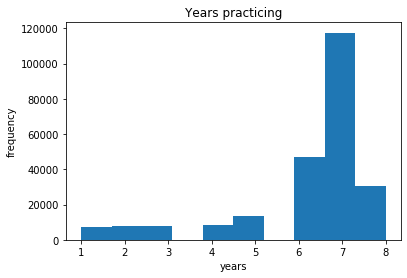

In [43]:
fig = plt.hist(main_df.years_practicing)
plt.title('Years practicing')
plt.xlabel("years")
plt.ylabel("frequency")

plt.savefig('years_practicing_hist.png', transparent=False, dpi=400, bbox_inches="tight")

#### `plt.savefig` - сохраняет фигуру в локальную папку, в которой находтися notebook, важные аргументы:
* `years_practicing_hist.png` - указываем название картинки
* `dpi` - разрешение изображения

#### Далее с помощью `Image` визуализируем сохранённую картинку в notebook.

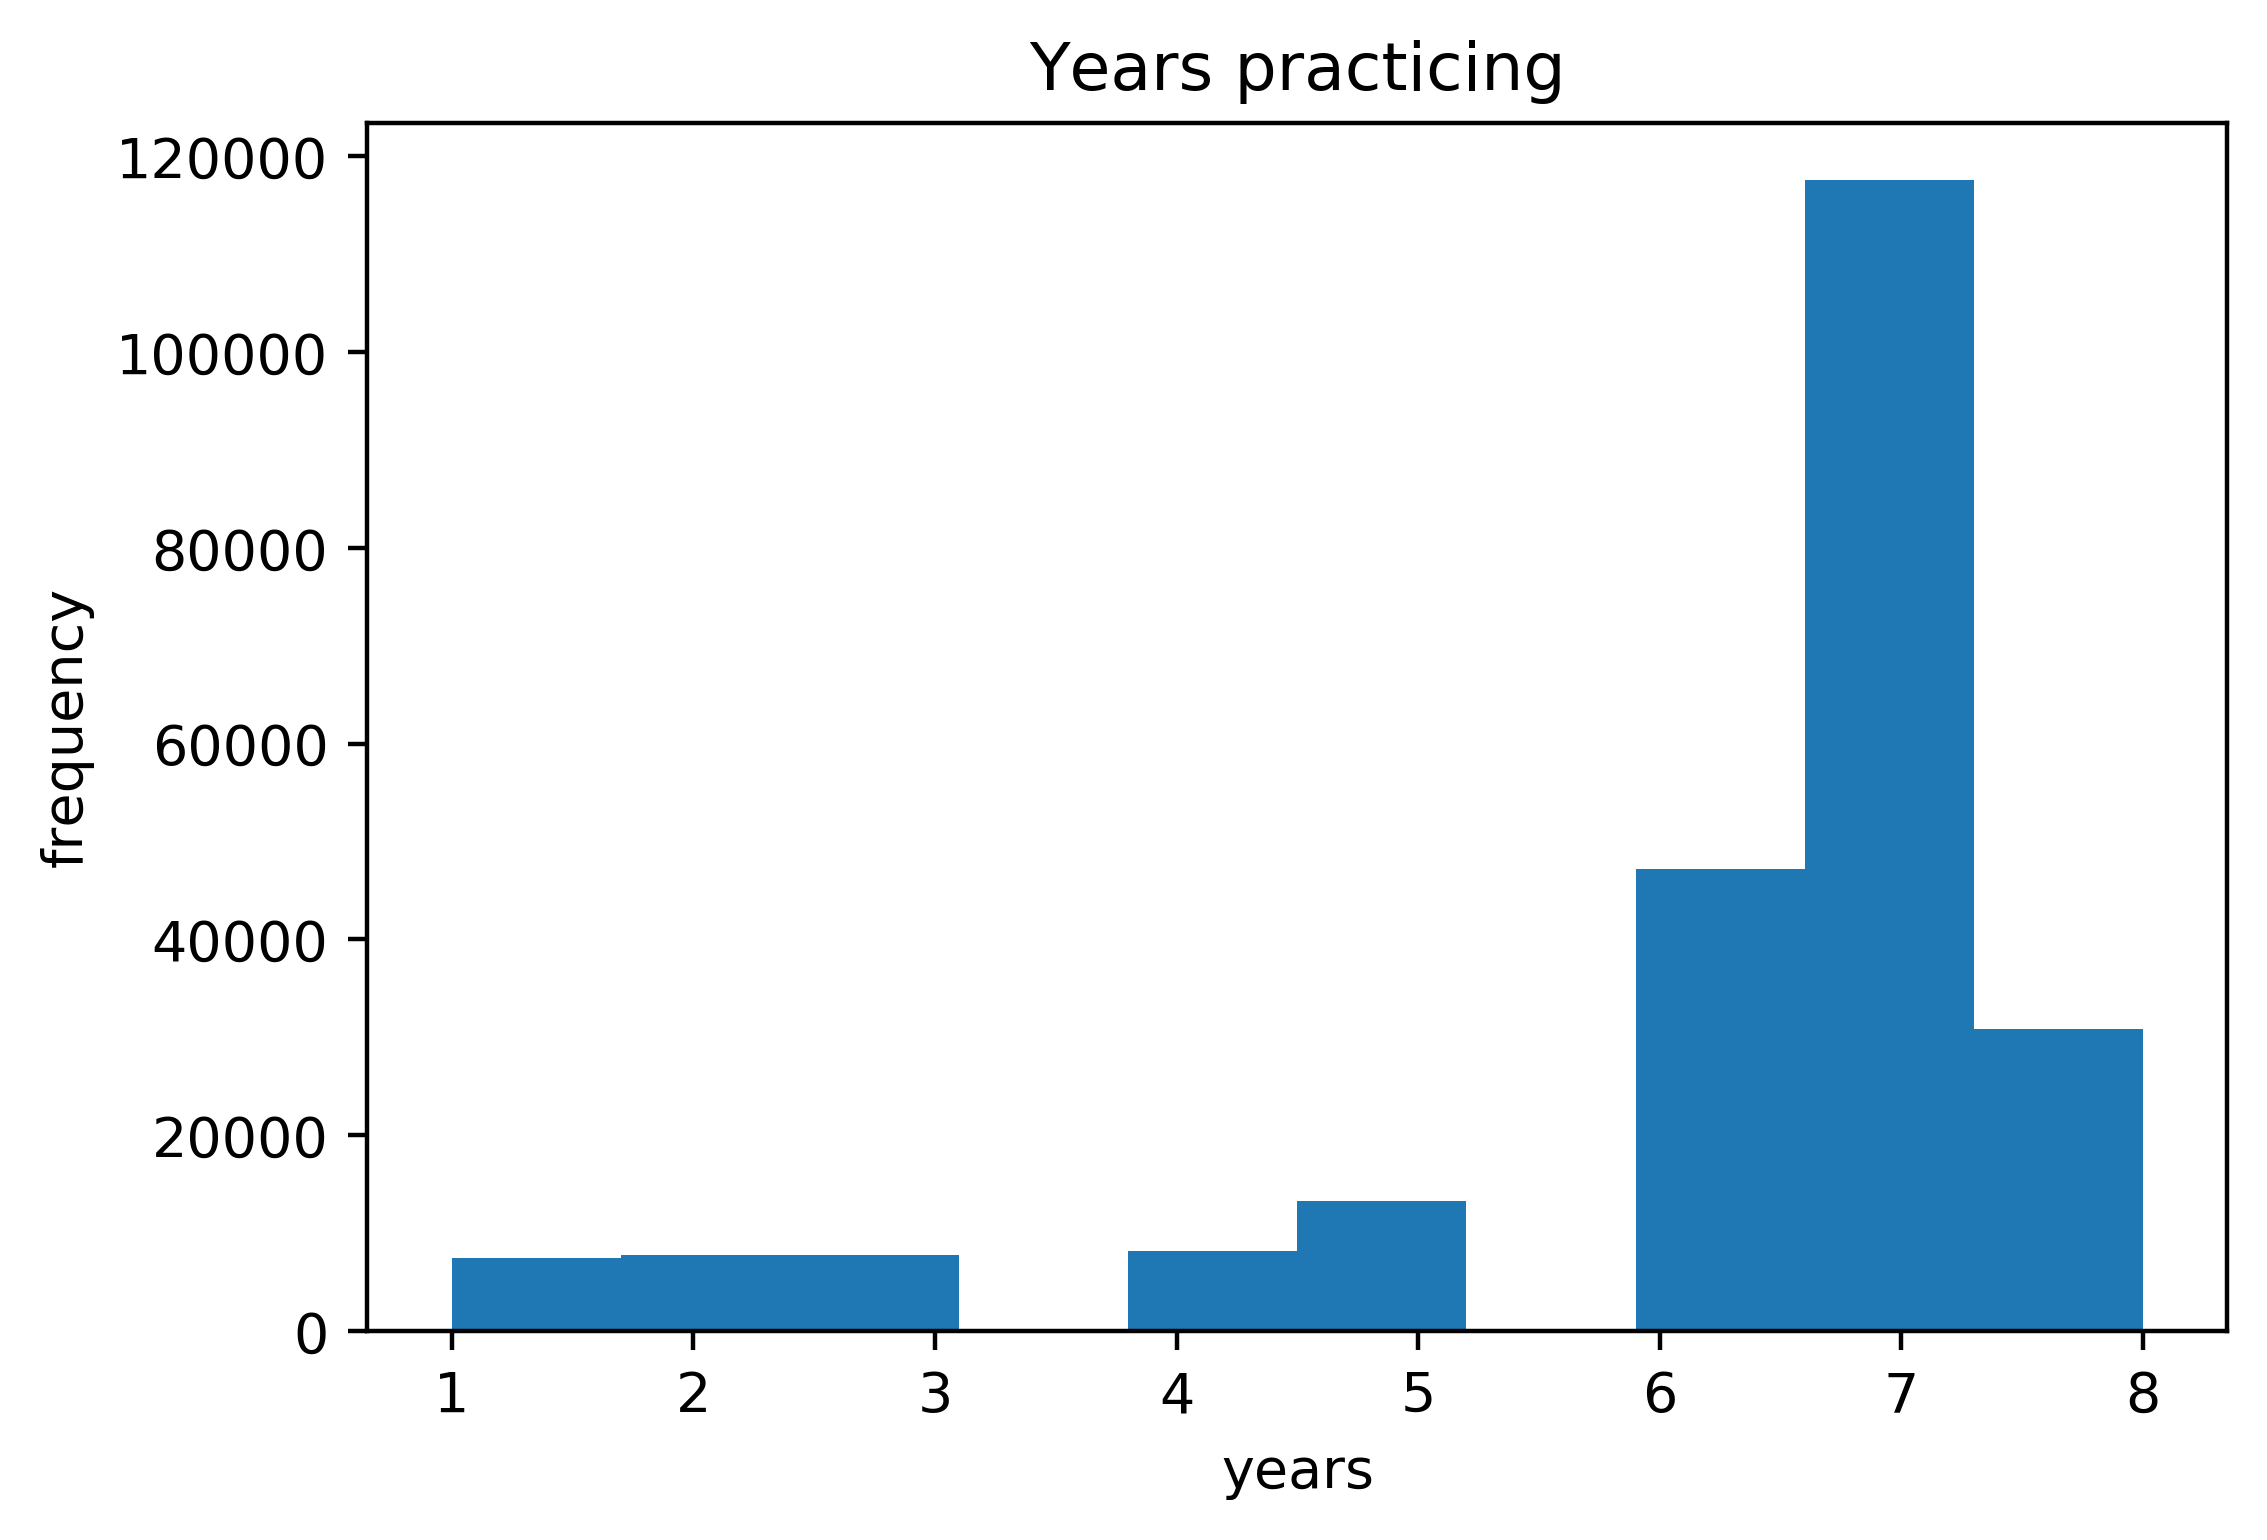

In [44]:
Image('years_practicing_hist.png')

#### Видим, что большая группа врачей имеет опыт практики от 6 до 8 лет. Посмотрим на распределени других показателей.

#### Здесь мы не видим реальной картины, но понимаем, что врачи выписывают до 3 тыс. оригинальных препаратов и 10 тыс. дженериков.

#### Изучим подробнее с помощью библиотек `matplotlib` и `seaborn`.

####  Для начала строим график парной корреляции 3-ох показателей с помощью библиотеки `seaborn` (импортированной нами как `sns`) и её метода `.pairplot()`. Аргументы методы (данные в скобках):


* `main_df` - наши данные;
* `vars` - столбцы, которые хотим визуализировать;
* `kind=reg` - добавляем на график красную линию регрессии, чтобы обозначить тренд;
* `plot_kws` - словарь в котором указаны настройки визуализации, цвета и прозрачность точек.

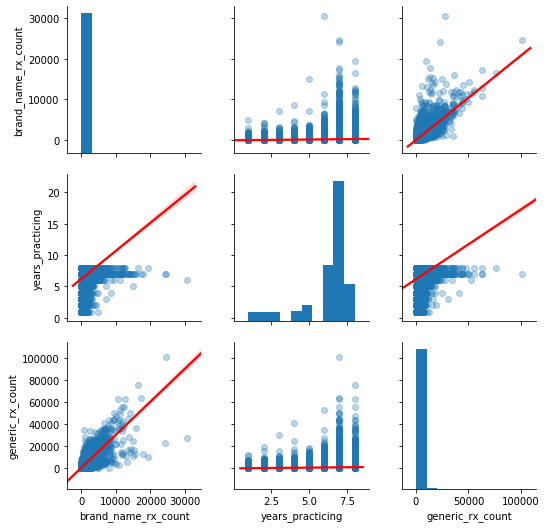

In [47]:
sns.pairplot(main_df, vars=['brand_name_rx_count','years_practicing' ,'generic_rx_count'], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

#### Точечный график для 3-х переменных

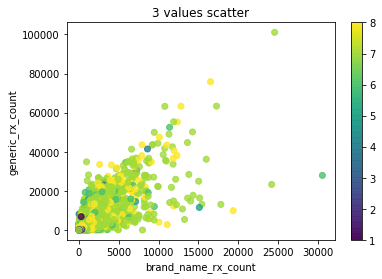

In [58]:
fig = plt.scatter(x=main_df.brand_name_rx_count, y=main_df.generic_rx_count, c=main_df.years_practicing, alpha=0.8)
plt.title('3 values scatter')
plt.xlabel("brand_name_rx_count")
plt.ylabel("generic_rx_count")
plt.colorbar(fig)

# сохраняем
plt.savefig('3_values_scatter.png', transparent=False, dpi=400, bbox_inches="tight")

#### Создадим новый признак (столбец) `bn_rx_proportion`, который будет оценивать соотношение между типами выписываемых препаратов. 

In [31]:
main_df['bn_rx_proportion'] = main_df['brand_name_rx_count'] / main_df['generic_rx_count']

In [32]:
# смотрим описани
main_df.describe(include='all')

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion
count,239930.000000,239930.000000,239930,239930,239930.000000,239930.000000,239930.000000,2.399300e+05
unique,NaN,NaN,4,282,NaN,NaN,NaN,NaN
top,NaN,NaN,South,General Practice,NaN,NaN,NaN,NaN
freq,NaN,NaN,80562,47836,NaN,NaN,NaN,NaN
mean,176.264144,795.547047,NaN,NaN,6.241875,0.623753,0.365357,inf
std,475.159281,1809.618284,NaN,NaN,1.649269,0.484444,0.481531,NaN
min,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,36.000000,NaN,NaN,6.000000,0.000000,0.000000,0.000000e+00
50%,15.000000,145.000000,NaN,NaN,7.000000,1.000000,0.000000,7.722541e-02
75%,154.000000,750.000000,NaN,NaN,7.000000,1.000000,1.000000,2.178503e-01


#### Видим, что в результате деления на `0` добавились значения `inf` (бесконечность), заменим такие значения на `0`. Используем метод `replace` и модуль `numpy`(импортирован как `np`).

In [33]:
main_df = main_df.replace([np.inf, -np.inf], 0)

In [34]:
main_df.describe(include='all')

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion
count,239930.000000,239930.000000,239930,239930,239930.000000,239930.000000,239930.000000,239930.000000
unique,NaN,NaN,4,282,NaN,NaN,NaN,NaN
top,NaN,NaN,South,General Practice,NaN,NaN,NaN,NaN
freq,NaN,NaN,80562,47836,NaN,NaN,NaN,NaN
mean,176.264144,795.547047,NaN,NaN,6.241875,0.623753,0.365357,0.218467
std,475.159281,1809.618284,NaN,NaN,1.649269,0.484444,0.481531,0.696692
min,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,NaN,NaN,6.000000,0.000000,0.000000,0.000000
50%,15.000000,145.000000,NaN,NaN,7.000000,1.000000,0.000000,0.065728
75%,154.000000,750.000000,NaN,NaN,7.000000,1.000000,1.000000,0.204597


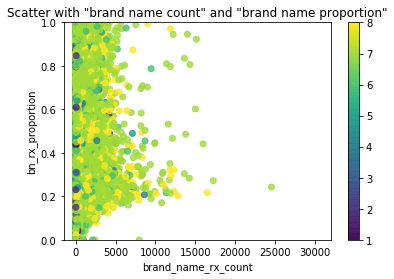

In [69]:
fig = plt.scatter(x=main_df.brand_name_rx_count,
                  y=main_df.bn_rx_proportion,
                  c=main_df.years_practicing,
                  alpha=0.8)
plt.title('Scatter with "brand name count" and "brand name proportion"')
plt.xlabel("brand_name_rx_count")
plt.ylabel("bn_rx_proportion")
plt.ylim(0, 1)
plt.colorbar(fig)
plt.savefig('Scatter_with_brand_name_count_and_proportion.png', transparent=False, dpi=400, bbox_inches="tight")

#### Частотность и плотность распределния `brand_name_rx_count` в зависимости от практики врача.

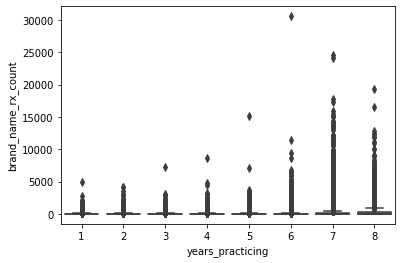

In [29]:
ax = sns.boxplot(x="years_practicing", y="brand_name_rx_count", data=main_df)

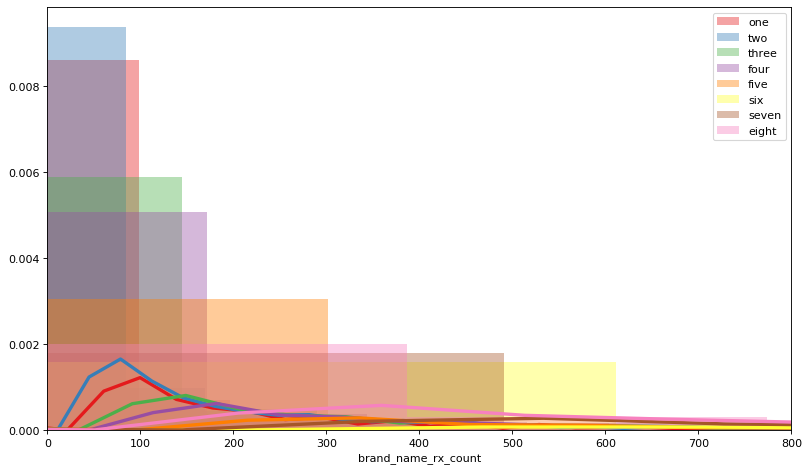

In [30]:
x1 = main_df.loc[main_df.years_practicing==1, 'brand_name_rx_count']
x2 = main_df.loc[main_df.years_practicing==2, 'brand_name_rx_count']
x3 = main_df.loc[main_df.years_practicing==3, 'brand_name_rx_count']
x4 = main_df.loc[main_df.years_practicing==4, 'brand_name_rx_count']
x5 = main_df.loc[main_df.years_practicing==5, 'brand_name_rx_count']
x6 = main_df.loc[main_df.years_practicing==6, 'brand_name_rx_count']
x7 = main_df.loc[main_df.years_practicing==7, 'brand_name_rx_count']
x8 = main_df.loc[main_df.years_practicing==8, 'brand_name_rx_count']

kwargs = dict(hist_kws={'alpha':0.4}, kde_kws={'linewidth':3})

with sns.color_palette("Set1", n_colors=8, desat=1):
    plt.figure(figsize=(12,7), dpi= 80)
    sns.distplot(x1, label="one", **kwargs)
    sns.distplot(x2, label="two", **kwargs)
    sns.distplot(x3, label="three", **kwargs)
    sns.distplot(x4, label="four", **kwargs)
    sns.distplot(x5, label="five", **kwargs)
    sns.distplot(x6, label="six", **kwargs)
    sns.distplot(x7, label="seven", **kwargs)
    sns.distplot(x8, label="eight", **kwargs)


plt.xlim(0,500)
plt.legend()

#### Частотность и плотность распределния `generic_rx_count` в зависимости от практики врача.

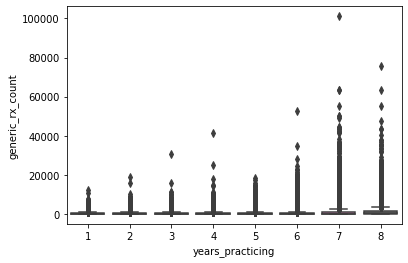

In [31]:
ax = sns.boxplot(x="years_practicing", y="generic_rx_count", data=main_df)

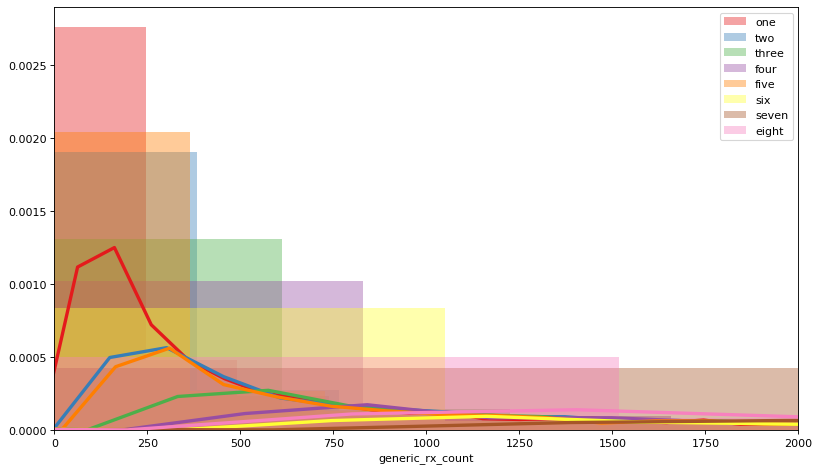

In [32]:
x1 = main_df.loc[main_df.years_practicing==1, 'generic_rx_count']
x2 = main_df.loc[main_df.years_practicing==2, 'generic_rx_count']
x3 = main_df.loc[main_df.years_practicing==3, 'generic_rx_count']
x4 = main_df.loc[main_df.years_practicing==4, 'generic_rx_count']
x5 = main_df.loc[main_df.years_practicing==5, 'generic_rx_count']
x6 = main_df.loc[main_df.years_practicing==6, 'generic_rx_count']
x7 = main_df.loc[main_df.years_practicing==7, 'generic_rx_count']
x8 = main_df.loc[main_df.years_practicing==8, 'generic_rx_count']

kwargs = dict(hist_kws={'alpha':0.4}, kde_kws={'linewidth':3})

with sns.color_palette("Set1", n_colors=8, desat=1):
    plt.figure(figsize=(12,7), dpi= 80)
    sns.distplot(x1, label="one", **kwargs)
    sns.distplot(x2, label="two", **kwargs)
    sns.distplot(x3, label="three", **kwargs)
    sns.distplot(x4, label="four", **kwargs)
    sns.distplot(x5, label="five", **kwargs)
    sns.distplot(x6, label="six", **kwargs)
    sns.distplot(x7, label="seven", **kwargs)
    sns.distplot(x8, label="eight", **kwargs)


plt.xlim(0,1700)
plt.legend()

#### Частотность выписывания типов препаратов по регионам.

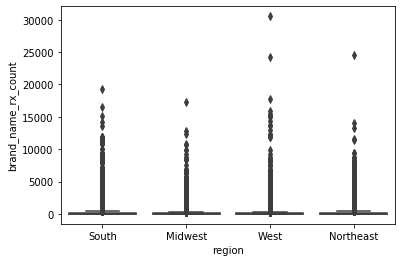

In [33]:
ax = sns.boxplot(x="region", y="brand_name_rx_count", data=main_df)

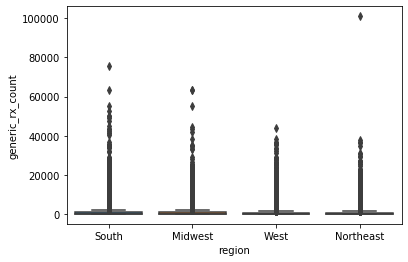

In [34]:
ax = sns.boxplot(x="region", y="generic_rx_count", data=main_df)

#### Соберем список врачей и отсортируем их по количеству представителей.

In [35]:
docs_series = main_df.specialty.value_counts(ascending=False)
docs_series

General Practice                                                             47836
Family                                                                       24230
Psychiatry                                                                   22530
Cardiovascular Disease                                                       13091
Medical                                                                      12445
Gastroenterology                                                              9695
Neurology                                                                     8501
Adult Health                                                                  7444
Nephrology                                                                    5997
Hematology & Oncology                                                         5852
Pulmonary Disease                                                             4295
Endocrinology, Diabetes & Metabolism                                          4136
Oral

#### Посмотрим какие врачи выписывают препараты чаще всего. Соберем таблицы в которые поместим врачей выписывающих большее количество рецептов. Используем сортировку по 2-м признакам (типам препаратов).

In [36]:
top_docs_bn_prescription = main_df.sort_values(by = ['brand_name_rx_count','generic_rx_count'], ascending=False)
top_docs_bn_prescription.head(20)

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion
npi,,,,,,,,
1720134695,30547,27912,West,Nephrology,6,1,0,1.094404
1598788689,24550,101079,Northeast,Geriatric Medicine,7,1,0,0.242879
1043244296,24184,23299,West,Cardiovascular Disease,7,1,0,1.037984
1376541961,19355,9915,South,Pulmonary Disease,8,1,1,1.952093
1023124054,17806,13100,West,Gastroenterology,7,1,0,1.359237
1982654638,17267,63352,Midwest,Geriatric Medicine,7,1,1,0.272557
1083619670,16505,75858,South,Geriatric Medicine,8,1,1,0.217578
1265488845,15979,36182,West,Cardiovascular Disease,7,1,0,0.441628
1356360887,15428,13190,West,Cardiovascular Disease,7,1,0,1.169674


In [37]:
top_docs_gn_prescription = main_df.sort_values(by = ['generic_rx_count','brand_name_rx_count'], ascending=False)
top_docs_gn_prescription.head(20)

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion
npi,,,,,,,,
1598788689,24550,101079,Northeast,Geriatric Medicine,7,1,0,0.242879
1083619670,16505,75858,South,Geriatric Medicine,8,1,1,0.217578
1982654638,17267,63352,Midwest,Geriatric Medicine,7,1,1,0.272557
1619952520,12805,63314,Midwest,Geriatric Medicine,8,1,1,0.202246
1235215575,10777,63233,South,Cardiovascular Disease,7,1,1,0.170433
1851300891,11884,55344,South,Sleep Medicine,7,1,1,0.214730
1952384505,12346,55272,Midwest,Geriatric Medicine,8,0,0,0.223368
1114052677,11369,52505,South,Geriatric Medicine,6,1,0,0.216532
1730103664,14248,50150,South,Geriatric Medicine,7,1,0,0.284108


#### Так же изучим врачей с нименьшим и наибольшим показателем `bn_rx_proportion`.

In [38]:
main_df[main_df['generic_rx_count'] != 0].sort_values(by='bn_rx_proportion', ascending=False).head(10)

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion
npi,,,,,,,,
1366493322,4932,29,South,Preventive Medicine/Occupational Environmental...,7,0,0,170.068966
1295875615,3558,94,Midwest,Otolaryngology/Facial Plastic Surgery,6,1,1,37.851064
1174525927,429,12,Northeast,Pulmonary Disease,8,1,1,35.750000
1053385815,2860,86,Midwest,Emergency Medical Services,7,1,0,33.255814
1235264953,404,13,West,Adult Health,6,1,0,31.076923
1518250828,309,11,South,Infectious Disease,2,1,0,28.090909
1245425370,443,16,Midwest,Pulmonary Disease,6,0,1,27.687500
1700936200,2585,94,South,"Endocrinology, Diabetes & Metabolism",6,1,1,27.500000
1356429088,390,15,West,Critical Care Medicine,7,1,1,26.000000


In [39]:
main_df[main_df['bn_rx_proportion'] != 0].sort_values(by='bn_rx_proportion').head(10)

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion
npi,,,,,,,,
1154655264,13,8192,South,Adult Health,4,0,1,0.001587
1942326335,14,2363,South,General Practice,6,1,1,0.005925
1578567343,12,1976,Midwest,MOHS-Micrographic Surgery,8,0,1,0.006073
1699765024,13,2137,South,Psychiatry,8,1,1,0.006083
1376538710,15,2442,Northeast,Orthopaedic Surgery of the Spine,8,1,0,0.006143
1376681999,12,1862,South,General Practice,6,1,0,0.006445
1962420869,12,1778,West,Medical,7,1,1,0.006749
1861498297,11,1606,West,Procedural Dermatology,8,1,0,0.006849
1083648075,11,1599,Midwest,Medical Oncology,7,0,1,0.006879


#### Изучим наиболее часто используемые препараты создадим переменную `total_medication_amount`.

In [53]:
total_medication_amount = drugs.sum()

In [55]:
total_medication_amount.sort_values(ascending=False)

LISINOPRIL                        5740387
HYDROCODONE-ACETAMINOPHEN         5726980
AMLODIPINE BESYLATE               5460966
OMEPRAZOLE                        5162765
SIMVASTATIN                       4912962
FUROSEMIDE                        4706591
ATORVASTATIN CALCIUM              4534888
LEVOTHYROXINE SODIUM              4378843
GABAPENTIN                        4005852
METOPROLOL TARTRATE               3858592
CLOPIDOGREL                       3484025
METOPROLOL SUCCINATE              3436520
CARVEDILOL                        3262735
WARFARIN SODIUM                   3147630
CLONAZEPAM                        3008628
TRAZODONE HCL                     2635159
ALPRAZOLAM                        2495256
METFORMIN HCL                     2485886
LOSARTAN POTASSIUM                2483130
PREDNISONE                        2469510
QUETIAPINE FUMARATE               2459593
SERTRALINE HCL                    2369237
HYDROCHLOROTHIAZIDE               2366724
ZOLPIDEM TARTRATE                 

#### Создадим таблицу для анализа частотности выписывания медикаментов по определнным специальностям. Объединяем `main_df.specialty` и `drugs`.

In [45]:
drugs_count = pd.concat([main_df.specialty, drugs],axis=1)

#### Так же нам потребуются методы библотеки `pandas`: [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) [`T(transpose)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html).

In [47]:
drugs_count = drugs_count.groupby(['specialty']).sum()
drugs_count = drugs_count.T
drugs_count.head(2)

In [123]:
drugs_count['Hematology & Oncology'].sort_values(ascending=False)

ANASTROZOLE                      433686
HYDROCODONE-ACETAMINOPHEN        199646
LETROZOLE                        176424
TAMOXIFEN CITRATE                150473
WARFARIN SODIUM                  137603
PREDNISONE                       126036
HYDROXYUREA                      120405
DEXAMETHASONE                    120333
PROCHLORPERAZINE MALEATE         100953
ONDANSETRON HCL                   93194
OMEPRAZOLE                        78489
OXYCODONE HCL                     75710
GABAPENTIN                        73787
LORAZEPAM                         73040
REVLIMID                          70325
EXEMESTANE                        66916
LEVOTHYROXINE SODIUM              57415
ZOLPIDEM TARTRATE                 54053
FUROSEMIDE                        52472
POTASSIUM CHLORIDE                49816
FENTANYL                          49635
ACYCLOVIR                         48991
GLEEVEC                           44163
MORPHINE SULFATE ER               42336
AMLODIPINE BESYLATE               42069


#### На основе увиденного определим специализации врачей для дальнейшего построения модели классификации.

In [57]:
target= docs_series[5:13]
target

Gastroenterology                        9695
Neurology                               8501
Adult Health                            7444
Nephrology                              5997
Hematology & Oncology                   5852
Pulmonary Disease                       4295
Endocrinology, Diabetes & Metabolism    4136
Oral and Maxillofacial Surgery          4075
Name: specialty, dtype: int64

In [58]:
target = list(target.index)
target

['Gastroenterology',
 'Neurology',
 'Adult Health',
 'Nephrology',
 'Hematology & Oncology',
 'Pulmonary Disease',
 'Endocrinology, Diabetes & Metabolism',
 'Oral and Maxillofacial Surgery']

In [59]:
del target[2]

In [60]:
target

['Gastroenterology',
 'Neurology',
 'Nephrology',
 'Hematology & Oncology',
 'Pulmonary Disease',
 'Endocrinology, Diabetes & Metabolism',
 'Oral and Maxillofacial Surgery']

#### Объединим `main_df` и `drugs` в таблицу аналогичную исходной, но занимающую меньше места.

In [64]:
full_df = pd.concat([main_df, drugs],axis=1)
print(full_df.info())
full_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 239930 entries, 1295763035 to 1144252818
Columns: 2405 entries, brand_name_rx_count to ZYVOX
dtypes: float64(1), int16(863), int64(5), int8(1534), object(2)
memory usage: 772.4+ MB
None


,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion,1ST TIER UNIFINE PENTIPS,ABACAVIR,...,ZYFLO,ZYFLO CR,ZYLET,ZYLOPRIM,ZYMAXID,ZYPREXA,ZYPREXA RELPREVV,ZYPREXA ZYDIS,ZYTIGA,ZYVOX
npi,,,,,,,,,,,,,,,,,,,,,
1295763035,384,2287,South,Nephrology,7,1,0,0.167906,0,0,...,0,0,0,0,0,0,0,0,0,0
1992715205,0,103,South,General Practice,7,1,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1578587630,0,112,Midwest,General Practice,7,1,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Создаем новую переменную `target_df` в которой будет таблица с данными о врачах с профессиями из списка `target`.

In [65]:
target_df = full_df[(full_df['specialty'].isin(target))]
target_df.head(2)

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion,1ST TIER UNIFINE PENTIPS,ABACAVIR,...,ZYFLO,ZYFLO CR,ZYLET,ZYLOPRIM,ZYMAXID,ZYPREXA,ZYPREXA RELPREVV,ZYPREXA ZYDIS,ZYTIGA,ZYVOX
npi,,,,,,,,,,,,,,,,,,,,,
1295763035,384,2287,South,Nephrology,7,1,0,0.167906,0,0,...,0,0,0,0,0,0,0,0,0,0
1437366804,316,1035,West,Nephrology,6,1,0,0.305314,0,0,...,0,0,0,0,0,0,0,0,0,0


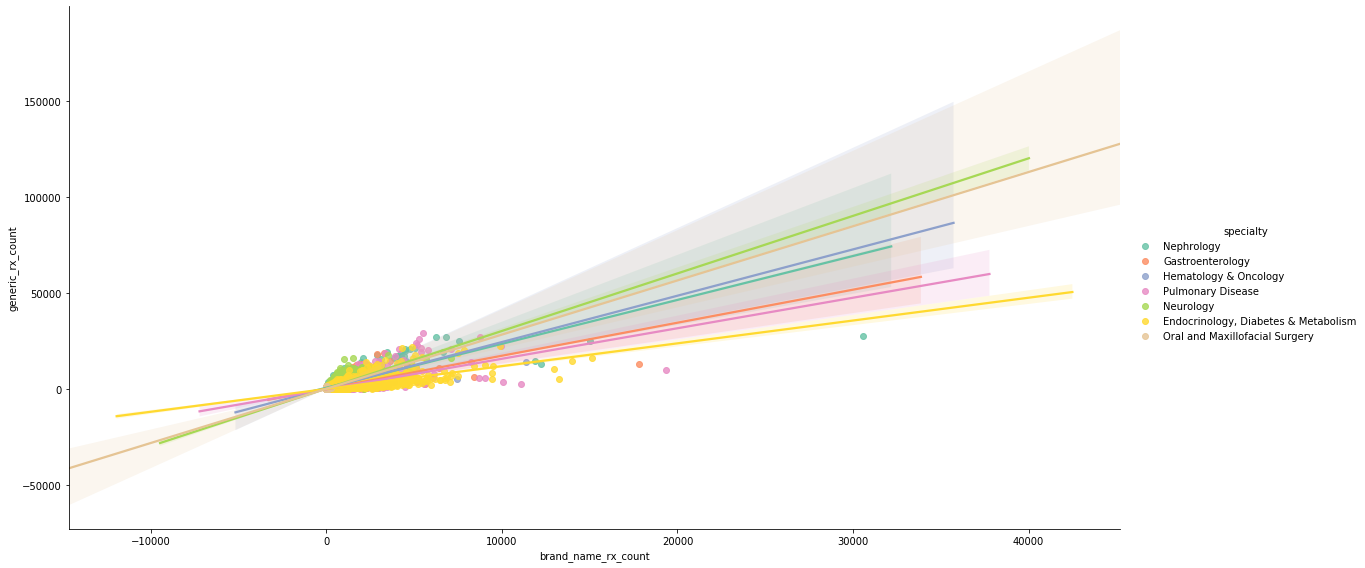

In [81]:
lmplot = sns.lmplot(data=target_df,x='brand_name_rx_count',y='generic_rx_count',hue='specialty', palette='Set2',  height=8, aspect=2)
lmplot.savefig("lmplot.png", transparent=False, dpi=400, bbox_inches="tight")

#### T-test позволяет оценить взаимосвязи между переменными, насколько группы данных однородные.

* чтобы узнать различаются ли группы между собой необходимо вычислить t-критерий Стьюдента;

* используем библотеку `scipy` метод `ttest_ind` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)`.

#### Гипотеза: онклоги разных направлений одинаково часто выписывают препарат `HYDROCODONE-ACETAMINOPHEN`.

In [95]:
H_Oncology_presription = full_df[full_df["specialty"]=='Hematology & Oncology']['HYDROCODONE-ACETAMINOPHEN']
R_Oncology_presription = full_df[full_df["specialty"]=='Radiation Oncology']['HYDROCODONE-ACETAMINOPHEN']

In [131]:
# сравниваем количество врачей по специальностям
len(H_Oncology_presription), len(R_Oncology_presription)

(5852, 1983)

#### Выравниваем объем выборки.

In [135]:
H_Oncology_presription = H_Oncology_presription.sample(1983)
# сравниваем количество врачей по специальностям
len(H_Oncology_presription), len(R_Oncology_presription)

(1983, 1983)

#### Для оценки дисперсии используем `statistics.variance()`

In [136]:
statistics.variance(H_Oncology_presription), statistics.variance(R_Oncology_presription)

(3167.679291128986, 576.6986743525822)

In [137]:
stat, p = ttest_ind(H_Oncology_presription, R_Oncology_presription, equal_var=False)

Ttest_indResult(statistic=15.535593498211725, pvalue=3.5057827887558896e-52)

stat=15.536, p=0.000

Похоже распределение разное.


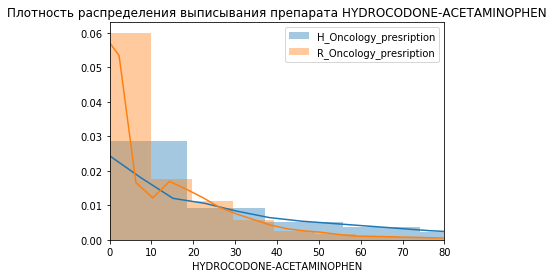

In [152]:
print('stat=%.3f, p=%.3f' % (stat, p))

print()
if p > 0.05:
    print('Данные здесь распределены одинаково.')
else:
    print('Похоже распределение разное.')
    
    
sns.distplot(H_Oncology_presription).set_xlim((0,80))
sns.distplot(R_Oncology_presription).set_xlim((0,80))

plt.title('Плотность распределения выписывания препарата HYDROCODONE-ACETAMINOPHEN')
plt.legend(['H_Oncology_presription', 'R_Oncology_presription'])

plt.show()

#### Значение Как видим гипотеза неверна. Посмотрим количество выписанных препаратов по специальностям.

In [125]:
drugs_count['Hematology & Oncology'].sort_values(ascending=False).head(10)

ANASTROZOLE                  433686
HYDROCODONE-ACETAMINOPHEN    199646
LETROZOLE                    176424
TAMOXIFEN CITRATE            150473
WARFARIN SODIUM              137603
PREDNISONE                   126036
HYDROXYUREA                  120405
DEXAMETHASONE                120333
PROCHLORPERAZINE MALEATE     100953
ONDANSETRON HCL               93194
Name: Hematology & Oncology, dtype: int64

In [126]:
drugs_count['Radiation Oncology'].sort_values(ascending=False).head(10)

TAMSULOSIN HCL               54938
HYDROCODONE-ACETAMINOPHEN    23716
ZOSTAVAX                      7316
DEXAMETHASONE                 6654
BICALUTAMIDE                  5394
LEVOTHYROXINE SODIUM          4499
LIDOCAINE HCL VISCOUS         4056
SILVER SULFADIAZINE           4003
OXYCODONE HCL                 3724
CIPROFLOXACIN HCL             3668
Name: Radiation Oncology, dtype: int64

#### Как выбрать данные по значениям нескольких столбцов? Использовать конструкцию:

In [156]:
selected_data = full_df[((full_df['ZOSTAVAX'] > 0) & (full_df['HYDROXYUREA'] > 0))]

In [157]:
selected_data.shape

(30, 2405)

In [159]:
selected_data.head()

,brand_name_rx_count,generic_rx_count,region,specialty,years_practicing,male,urban,bn_rx_proportion,1ST TIER UNIFINE PENTIPS,ABACAVIR,...,ZYFLO,ZYFLO CR,ZYLET,ZYLOPRIM,ZYMAXID,ZYPREXA,ZYPREXA RELPREVV,ZYPREXA ZYDIS,ZYTIGA,ZYVOX
npi,,,,,,,,,,,,,,,,,,,,,
1740235928,249,1318,South,Hematology & Oncology,7,1,0,0.188923,0,0,...,0,0,0,0,0,0,0,0,0,0
1457364671,2245,20356,South,Adolescent Medicine,7,1,1,0.110287,0,0,...,0,0,0,0,0,0,0,0,0,0
1508899063,1710,9290,Northeast,Geriatric Medicine,7,0,1,0.184069,0,0,...,0,0,0,0,0,0,0,0,0,0
1477551380,313,1989,South,Hematology & Oncology,8,0,0,0.157366,0,0,...,0,0,0,0,0,0,0,0,0,0
1205832375,626,4713,Midwest,Hematology & Oncology,8,1,1,0.132824,0,0,...,0,0,0,0,0,0,0,0,0,0


## [kNN (K-Nearest Neighbors)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

#### Создаем выборку для сравнения

In [171]:
target_df = full_df[(full_df['specialty'].isin(['Nephrology','Hematology & Oncology']))]
target_df.shape

(11849, 2405)

In [175]:
target_df = target_df.sample(4000)

In [176]:
X = target_df.iloc[:, 4:].values
y = target_df.iloc[:, 3].values

### Далее последовательно импортируем методы и проводим преобразования и вычисления.

In [177]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train

array([[7., 1., 0., ..., 0., 0., 0.],
       [4., 1., 1., ..., 0., 0., 0.],
       [7., 1., 0., ..., 0., 0., 0.],
       ...,
       [7., 1., 1., ..., 0., 0., 0.],
       [7., 1., 0., ..., 0., 0., 0.],
       [5., 0., 1., ..., 0., 0., 0.]])

In [185]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [186]:
?KNeighborsClassifier

#### Метод `fit(X_train, y_train)` учит модель на тренировочных данных `X_train` и ответах `y_train`.

In [187]:
classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Просим модель предсказать ответы(`y_test`) для тестовых данных `X_test`.

In [188]:
y_pred = classifier.predict(X_test)

In [190]:
# импортируем метрику оценки качества
from sklearn.metrics import accuracy_score

In [195]:
y_test[:20]

array(['Nephrology', 'Hematology & Oncology', 'Nephrology',
       'Hematology & Oncology', 'Nephrology', 'Nephrology', 'Nephrology',
       'Hematology & Oncology', 'Nephrology', 'Hematology & Oncology',
       'Hematology & Oncology', 'Hematology & Oncology',
       'Hematology & Oncology', 'Hematology & Oncology',
       'Hematology & Oncology', 'Nephrology', 'Hematology & Oncology',
       'Nephrology', 'Nephrology', 'Nephrology'], dtype=object)

In [196]:
y_pred[:20]

array(['Nephrology', 'Nephrology', 'Nephrology', 'Hematology & Oncology',
       'Nephrology', 'Nephrology', 'Nephrology', 'Hematology & Oncology',
       'Nephrology', 'Hematology & Oncology', 'Hematology & Oncology',
       'Hematology & Oncology', 'Hematology & Oncology',
       'Hematology & Oncology', 'Hematology & Oncology', 'Nephrology',
       'Hematology & Oncology', 'Nephrology', 'Nephrology', 'Nephrology'],
      dtype=object)

In [197]:
accuracy_score(classifier.predict(X_test), ay_test)

0.9575